# Quantum Hello World!

In [1]:
# Building the circuit
from qiskit import *

In [2]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [3]:
qr

QuantumRegister(2, 'q0')

In [4]:
cr

ClassicalRegister(2, 'c0')

In [5]:
circuit = QuantumCircuit(qr, cr)

In [6]:
# We can also write
circuit = QuantumCircuit(2,2)

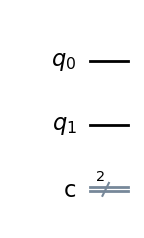

In [7]:
circuit.draw()

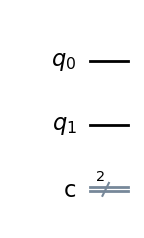

In [8]:
%matplotlib inline 
# below should give better view as compared to above one. However,both are same nowadays!
circuit.draw(output='mpl')

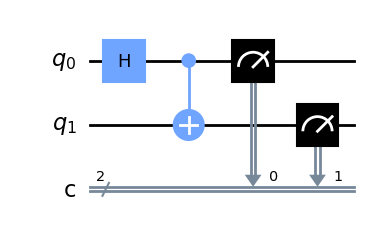

In [9]:
# the quantum circuit has two qubits. they are indexed as qubits 0 and 1
circuit.h(0)
circuit.cx(0,1) # order is control, target
circuit.measure([0,1], [0,1]) # qubits [0,1] are measured and results are stored in classical bits [0,1] in order
circuit.draw(output='mpl')

# Run Using simulator

In [10]:
simulator = Aer.get_backend('qasm_simulator')

Then, we execute the circuit on the simulator and store the results in a variable called `result`.

In [11]:
result = execute(circuit, backend=simulator).result()

At this point, we are ready to plot the results of the simulator execution. To do this, first import the visualization tools from Qiskit using

In [12]:
from qiskit.visualization import plot_histogram

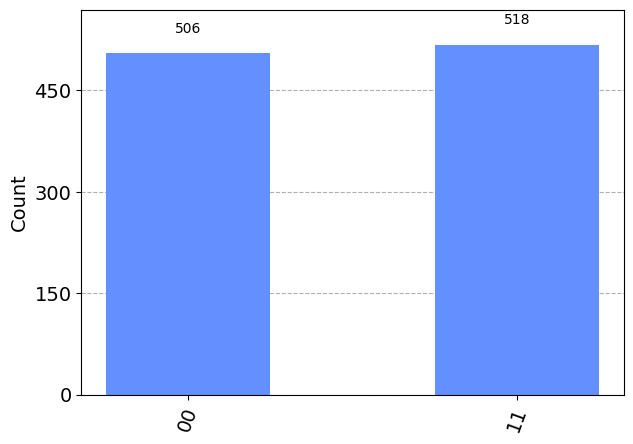

In [13]:
plot_histogram(result.get_counts(circuit))

# Running on real quantum hardware

In [14]:
# This means both qbits are entangled, hence both are having same state ideally. 
# In reality we'll have some noice, which we'll see below.

In order to run the circuit on real quantum hardware at IBM, we begin by loading our saved IBMQ account using

In [15]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')

/tmp/ipykernel_88/3890573571.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
/tmp/ipykernel_88/3890573571.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


Then,we choose the backend that we want to use in our run.

In [16]:
qcomp = provider.get_backend('ibmq_lima')

In [17]:
#Generally, if we have no preference on which backend I'd like to use, 
#We will ask for the least busy backend by using

num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_quito


In [18]:
qcomp = provider.get_backend(str(qcomp))

A useful feature is to run the job watcher that is available in the latest version of Qiskit using

In [19]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [20]:
job = execute(circuit, backend=qcomp)

We can also monitor the job progress inline using the job monitor:

In [21]:
%time
from qiskit.tools.monitor import job_monitor
job_monitor(job)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 8.11 µs
Job Status: job has successfully run


Once the job runs sucessfully, we can visualize the results using `plot_histogram` as before using

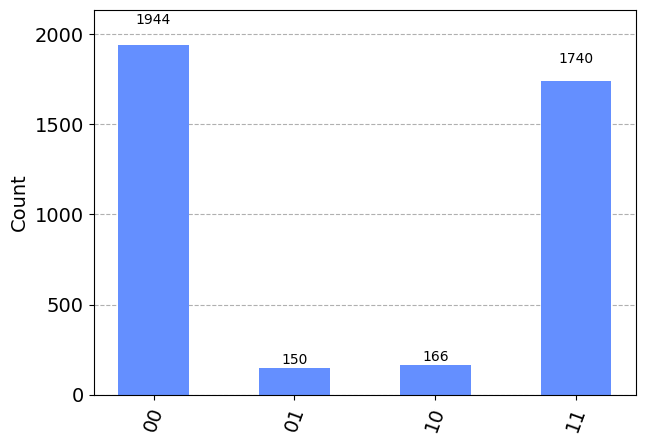

In [22]:
result = job.result()
plot_histogram(result.get_counts(circuit))

We can see the above chart, [01,10] are the noice which is present in actual IBM quantum machine. However it wasnt there in the ssimulation.

In [23]:
# To see version
qiskit.__qiskit_version__

{'qiskit-terra': '0.24.1', 'qiskit-aer': '0.12.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.2', 'qiskit-nature': '0.6.2', 'qiskit-finance': '0.3.4', 'qiskit-optimization': '0.5.0', 'qiskit-machine-learning': '0.6.1'}